# Gliders in the Rockall Trough: the 2021 onset of the spring bloom in the eastern subpolar North Atlantic

Name:

Collaborators:


# Data sources (must be cited in your paper!)

+ Sea surface color (climatologies and near-real time) from satellites is from the [MODIS sensor on NASA's Aqua satellite](https://modis.gsfc.nasa.gov/data/dataprod/chlor_a.php) most easily accessed by [this interactive viewer](https://oceancolor.gsfc.nasa.gov/l3/).  The formal citation for the MODIS sea surface color data is:

Hu, C., Lee Z., and Franz, B.A. (2012). Chlorophyll-a algorithms for oligotrophic oceans:A novel approach based on three-band reflectance difference, J. Geophys. Res., 117, C01011, doi:10.1029/2011JC007395.

+ Near real time glider data are from:

Dumont, E., Cunningham, S. A., and Inall, M. (2021). Seaglider data from the Ellett Array/CLASS/OSNAP projects. Accessed via: http://vocal.sams.ac.uk/dashboard.php, May 2021.

+ Climatological glider data are from:

Gary, S. F., Cunningham, S. A., Johnson, C., Houpert, L., Holliday, N. P., Behrens, E., Biastoch, A., & Böning, C. W. (2018). Seasonal cycles of oceanic transports in the eastern subpolar North Atlantic. Journal of Geophysical Research: Oceans, 123(2), 1471-1484, doi:10.1002/2017JC013350.

+ Climatological light input data were obtained from the [NASA Langley Research Center Atmospheric Science Data Center](https://asdc.larc.nasa.gov/project/SRB/SRB_REL3.0_LPSA_MONTHLY_NC_1):

Kato, Seiji (2007) A Long-Term TOA and Constrained Surface Radiation Budget Dataset Using Merged CERES, ERBE and ISCCP/SRB Products from the Past 30 Years, https://earthdata.nasa.gov/esds/competitive-programs/measures/long-term-toa-and-constrained-surface-radiation-budget-dataset, doi:10.5067/SRB/REL3.0_LPSA_MONTHLY_NC_L3, downloaded Nov. 22, 2020.

# Load supporting libraries and define MLD function

In [1]:
import load_glider_data as sg
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

#=================================
# Function to find the mixed layer
# depth (MLD) based on the depth
# of first occurance of a density
# difference greater than s0_thresh
# (the threshold density difference).
def find_mld(de,s0,s0_thresh):
    # Find the difference with the surface
    # density.  Since bubbles at the surface
    # can cause bad density values at the
    # very top of the water column, find the
    # minimum density of the profile after
    # ignoring all the NaN (not a number)
    # placeholders for missing/bad data.
    ds0 = s0-s0[~np.isnan(s0)].min()
    
    # Find all the values that are right at
    # and below the MLD.  Select the single
    # value at the MLD by taking the minimum
    # depth and density.
    de_mld = de[ds0 > s0_thresh].min()
    s0_mld = s0[ds0 > s0_thresh].min()
    
    return de_mld, s0_mld
    

# Results

## Step 1: Climatological profiles -> FIGURE 2 (April 29)

+ Load the climatological (time-mean) profiles from 10.1W, 57.1N from [Gary et al. (2018)](https://agupubs.onlinelibrary.wiley.com/doi/full/10.1002/2017JC013350).  These profiles have exactly the same format as the glider data we plotted in previous assignments although they are really a blend of ship, glider, and other robot observations - basically all data available in the region!  They represent the best estimate of long-term average conditions for each season.  To access them, use glider number `'000'` and request profiles `['DJF', 'MAM', 'JJA', and 'SON']`.

+ The goal for Figure 1 is to plot the seasonal climatological profiles of **density** and using the `find_mld` function above, also plot the mixed layer depth.  The resulting figure should look a lot like Segar's [Chapter 8](https://reefimages.com/oceans/SegarOcean4Chap08.pdf)'s Figure 8-20, but all profiles are overlaid on top of each other.

+ Label both axes and include a legend so we know which line corresponds to which season.

+ You are welcome to reuse code from previous assignments.

+ If you would like a more involved challenge, **monthly** climatological data are also available, e.g. `['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']`.  You have the **option** of plotting *monthly* profiles (as presented in the lab into slides) instead of the *seasonal* profiles.  If you choose monthly data, due to the larger number of profiles, I would recommend applying an offset to each profile to create a waterfall plot rather than a pure overlay. 

Text(0, 0.5, 'Depth [m]')

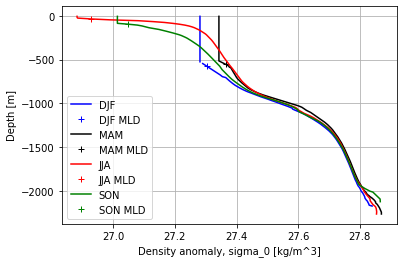

In [2]:
# Plot seasonal climatology density profiles

fig, ax = plt.subplots()

[lon, lat, de, te, sa, th, s0, year, month, day] = sg.load_hb_profile('000','DJF')
ax.plot(s0,-1.0*de,'b-')

de_mld, s0_mld = find_mld(de,s0,0.02)
ax.plot(s0_mld,-1.0*de_mld,'b+')

[lon, lat, de, te, sa, th, s0, year, month, day] = sg.load_hb_profile('000','MAM')
ax.plot(s0,-1.0*de,'k-')

de_mld, s0_mld = find_mld(de,s0,0.02)
ax.plot(s0_mld,-1.0*de_mld,'k+')

[lon, lat, de, te, sa, th, s0, year, month, day] = sg.load_hb_profile('000','JJA')
ax.plot(s0,-1.0*de,'r-')

de_mld, s0_mld = find_mld(de,s0,0.02)
ax.plot(s0_mld,-1.0*de_mld,'r+')

[lon, lat, de, te, sa, th, s0, year, month, day] = sg.load_hb_profile('000','SON')
ax.plot(s0,-1.0*de,'g-')

de_mld, s0_mld = find_mld(de,s0,0.02)
ax.plot(s0_mld,-1.0*de_mld,'g+')

ax.legend(['DJF','DJF MLD','MAM','MAM MLD','JJA','JJA MLD','SON','SON MLD'])
ax.grid()
ax.set_xlabel('Density anomaly, sigma_0 [kg/m^3]')
ax.set_ylabel('Depth [m]')

**Figure 2:** You can enter your caption here as your make the figure.  Then you can cut and paste it into your final report document later. 

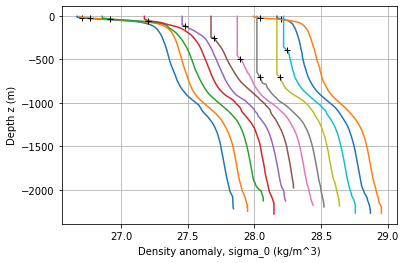

In [3]:
# (OPTIONAL!) Plot monthly climatology density profiles waterfall plot
# This is exactly the data that went into mld_clim.txt.

fig, ax = plt.subplots()

mons = ['Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec','Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun']

s0_offset = 0.0
ds0 = 0.1

for mon in mons:
    [lon, lat, de, te, sa, th, s0, year, month, day] = sg.load_hb_profile('000',mon)
    ax.plot(s0+s0_offset,-1.0*de)
    
    de_mld, s0_mld = find_mld(de,s0,0.02)
    ax.plot(s0_mld+s0_offset,-1.0*de_mld,'k+')

    s0_offset = s0_offset + ds0
    
ax.set_xlabel('Density anomaly, sigma_0 (kg/m^3)')
ax.set_ylabel('Depth z (m)')
ax.grid()

# Step 2: Climatological time series -> start FIGURE 2  (April 29)

Text(0, 0.5, 'MLD, [m], Chlorophyll [mg/kg x 200], SW [W/m^2]')

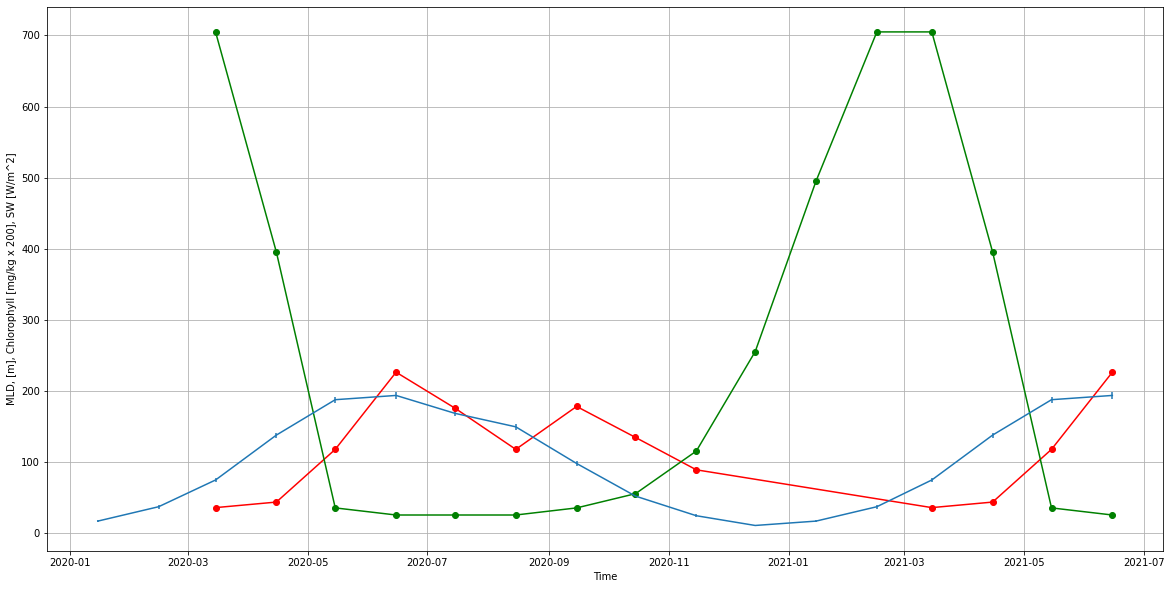

In [6]:
fig, ax = plt.subplots(figsize=(20,10))

# Light climatology
light = np.loadtxt('light_clim.csv',delimiter=',')
ymd = light[:,0:3].astype(int)
light_dates = [dt.datetime(*dd) for dd in ymd]
light_wpm3_avg = light[:,3]
light_wpm3_std = np.sqrt(light[:,4])
ax.errorbar(light_dates,light_wpm3_avg,yerr=light_wpm3_std)

# CHL climatology
chl_clim = np.loadtxt('chl_clim.txt',delimiter=',')
ymd = chl_clim[:,0:3].astype(int)
chl_clim_data = chl_clim[:,3]
chl_clim_dates = [dt.datetime(*dd) for dd in ymd]
ax.plot(chl_clim_dates,chl_clim_data*200,'ro-')

# MLD climatology
mld_clim = np.loadtxt('mld_clim.txt',delimiter=',')
ymd = mld_clim[:,0:3].astype(int)
mld_clim_data = mld_clim[:,3]
mld_clim_dates = [dt.datetime(*dd) for dd in ymd]
ax.plot(mld_clim_dates,mld_clim_data,'go-')

ax.grid()
ax.set_xlabel('Time')
ax.set_ylabel('MLD, [m], Chlorophyll [mg/kg x 200], SW [W/m^2]')

**Figure 3:** Caption goes here and also into your paper.

# Step 3: Near Real Time data -> finish Figure 2 (May 6)

In [ ]:
# MLD 2020-2021
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(mld_dates,mld_data,'b')

# Light climatology
light = np.loadtxt('light_clim.csv',delimiter=',')
ymd = light[:,0:3].astype(int)
light_dates = [datetime.datetime(*dd) for dd in ymd]
light_wpm3_avg = light[:,3]
light_wpm3_std = np.sqrt(light[:,4])
ax.errorbar(light_dates,light_wpm3_avg,yerr=light_wpm3_std)

# CHL climatology
chl_clim = np.loadtxt('chl_clim.txt',delimiter=',')
ymd = chl_clim[:,0:3].astype(int)
chl_clim_data = chl_clim[:,3]
chl_clim_dates = [datetime.datetime(*dd) for dd in ymd]
ax.plot(chl_clim_dates,chl_clim_data*200,'ro-')

# MLD climatology
mld_clim = np.loadtxt('mld_clim.txt',delimiter=',')
ymd = mld_clim[:,0:3].astype(int)
mld_clim_data = mld_clim[:,3]
mld_clim_dates = [datetime.datetime(*dd) for dd in ymd]
ax.plot(mld_clim_dates,mld_clim_data,'go-')

# CHL R3QL
chl_r3ql, chl_r3ql_dates = sg.load_chl(-10,57,'R3QL')
ax.plot(chl_r3ql_dates,chl_r3ql*200,'ko-')

# CHL 8D
chl_8d, chl_8d_dates = sg.load_chl(-10,57,'8D')
ax.plot(chl_8d_dates,chl_8d*200,'yo-')


# Discussion

Discussion questions go here.